# Python 机器学习实战 ——代码样例

# 第十九章 人工神经网络

## 卷积神经网络识别手写数字图片

下面，我们用 Keras搭建一个简单的卷积神经网络，识别 Mnist 数字图片数据集。


Using TensorFlow backend.


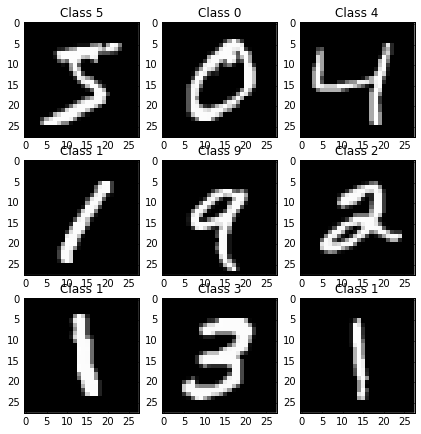

In [2]:
# 将matplotlib的图表直接嵌入到Notebook之中。
%matplotlib inline  

# 导入相关的库。

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7)
from keras.datasets import mnist   
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten 
from keras.utils import np_utils
from keras import backend as K
from keras.layers import Convolution2D, MaxPooling2D

# 设置变量。

nb_classes = 10
img_rows, img_cols = 28, 28

# 下载数据集。

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 查看训练样本图片的样子，如下图所示。

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))


In [3]:
# 数据预处理。

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# 将样本数据标准化到 0-1 区间。

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# 查看训练集的形状，每个数字都有 6 千个样本，共 6 万张图片。

print("X_train original shape", X_train.shape)  
print("y_train original shape", y_train.shape)  
 
# 将标签 ( 即 Y 值 ) 处理成 binary matrix, 如下。

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)  

# 建立神经网络模型。

model = Sequential()

# 创建第一层，卷积层 ( 32 个卷积核，尺寸 3*3 )。

model.add(Convolution2D(nb_filter=32, nb_row=3,nb_col=3, border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))

# 创建第二层，卷积层。

model.add(Convolution2D(nb_filter=32, nb_row=3, nb_col=3)) 
model.add(Activation('relu'))

# 创建第三层，池化层。

model.add(MaxPooling2D(pool_size=(2,2)))

# 创建第四层，全连接层。

model.add(Flatten()) 
model.add(Dense(128)) 
model.add(Activation('relu')) 

model.add(Dense(nb_classes)) 
model.add(Activation('softmax'))

# 设置损失函数和优化器。

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# 开始训练模型。

model.fit(X_train, Y_train, batch_size=128, nb_epoch=15,
          verbose=1, validation_data=(X_test, Y_test))

# 观察测试集上的准确率。

score = model.evaluate(X_test, Y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# 保存模型文件成 json 和 h5 格式，以便后续调用。

model_structure = model.to_json()
open('model_structure.json', 'w').write(model_structure)
model.get_weights()
weights = model.save_weights('model_weight.h5', overwrite=True)


X_train original shape (60000, 28, 28, 1)
y_train original shape (60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 180s - loss: 0.1849 - acc: 0.9451 - val_loss: 0.0605 - val_acc: 0.9811
Epoch 2/15
60000/60000 [==============================] - 180s - loss: 0.0513 - acc: 0.9844 - val_loss: 0.0447 - val_acc: 0.9841
Epoch 3/15
60000/60000 [==============================] - 181s - loss: 0.0327 - acc: 0.9892 - val_loss: 0.0358 - val_acc: 0.9887
Epoch 4/15
60000/60000 [==============================] - 180s - loss: 0.0220 - acc: 0.9929 - val_loss: 0.0369 - val_acc: 0.9887
Epoch 5/15
60000/60000 [==============================] - 177s - loss: 0.0169 - acc: 0.9946 - val_loss: 0.0417 - val_acc: 0.9878
Epoch 6/15
60000/60000 [==============================] - 169s - loss: 0.0117 - acc: 0.9962 - val_loss: 0.0396 - val_acc: 0.9880
Epoch 7/15
60000/60000 [==============================] - 173s - loss: 0.0108 - acc: 0.9964 - val_loss